Optimization problem:
$$
F(x)\to min(max)
$$

$$
x^*=argmin(max)_X F(x)
$$

Common family of iterative optimization methods is known as "gradient descent":

$$
x^{j+1}=x^j-(+)\lambda_j \triangledown F(x^j),
$$

where $\nabla F(x)$ denotes a gradient vector of $F$ in the point $x$, while $\lambda_j$ are certain real positive numbers picked up with respect to $F(x^{j+1})<(>)F(x^j)$.

### Optimization example. 
Consider several points on the map and look for a such a centroid location that sum of distances from it to the given points is minimal:
$$
\sum\limits_i \sqrt{(x_i-x^*)^2+(y_i-y^*)^2}\to min
$$

In [3]:
#import all the required libraries
import numpy as np
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(0, 10)

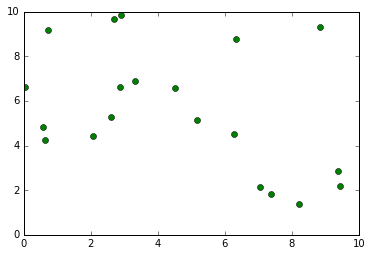

In [7]:
random.seed(2015) #fix an initial point of the random generator
#create 20 random locations with uniformly distributed coordinates between 0 and 10
x=stats.uniform.rvs(0,10,20)
y=stats.uniform.rvs(0,10,20)
#plot the points
plt.figure()
plt.plot(x,y,'go')
plt.xlim(0,10)
plt.ylim(0,10)

[ 3.80114465  5.36184751]
[ 3.76705774  5.93304754]
[ 4.03379298  5.92249482]
[ 4.03495211  5.92641014]
[ 4.034886    5.92639866]
Optimization terminated successfully.
         Current function value: 74.264646
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9


   status: 0
  success: True
     njev: 9
     nfev: 9
 hess_inv: array([[ 0.29929803, -0.03646633],
       [-0.03646633,  0.23555082]])
      fun: 74.26464596014955
        x: array([ 4.034886  ,  5.92639866])
  message: 'Optimization terminated successfully.'
      jac: array([  2.30952157e-09,   5.00237886e-08])

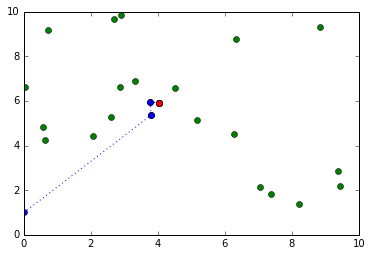

In [26]:
from scipy.optimize import minimize

def f(xy): #function computing cumulative distance from a considered centroid point to all the given ones
    return sum(np.sqrt((np.square(x-xy[0])+np.square(y-xy[1]))))

def f_der(xy): #gradient of the function above with respect to the coordinates x,y of the considered point
    f_=np.sqrt((np.square(x-xy[0])+np.square(y-xy[1])))
    return -np.array([sum((x-xy[0])/f_),sum((y-xy[1])/f_)])

#plot the given points
plt.figure()
plt.plot(x,y,'go')
plt.xlim(0,10)
plt.ylim(0,10)
#set up initial centroid location 
prevpoint=[0, 1];

def visiter(params):
    #visualize current iteration results connecting previous centroid location to the new one
    global prevpoint
    plt.plot([prevpoint[0],params[0]],[prevpoint[1],params[1]],'b:o')
    plt.plot(params[0],params[1],'ro')
    prevpoint=params
    print(params)
    
#find an optimal centroid location minimizing the cumulative distance to the given points (f) using the gradient (f_der)
#with respect to given accuracy gtol, visualizing results of each iteration
minimize(f, prevpoint, method='BFGS', jac=f_der, options={'gtol': 1e-4, 'disp': True}, callback=visiter)